In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [65]:
# read data set
path = "Student_Performance.csv"
data = pd.read_csv(path)

In [66]:
# see top 5 rows
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [80]:
# randomly select 10 row entries
data.sample(n=10, random_state=42)  # Change random_state if you want different random samples

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,No,8,2,51.0
4684,2,46,Yes,4,8,20.0
1731,7,56,Yes,7,5,46.0
4742,6,42,Yes,8,5,28.0
4521,7,53,No,4,6,41.0
6340,9,63,No,4,7,59.0
576,6,59,Yes,4,1,48.0
5202,6,96,No,9,7,87.0
6363,7,46,No,7,8,37.0
439,7,79,Yes,9,4,73.0


Pearson Correlation Coefficient for Hours Studied: 0.4427188892690009
Pearson Correlation Coefficient for Previous Scores: 0.9571423443555771
Pearson Correlation Coefficient for Sleep Hours: 0.48215289791583416
Pearson Correlation Coefficient for Sample Question Papers Practiced: -0.14038376278079817


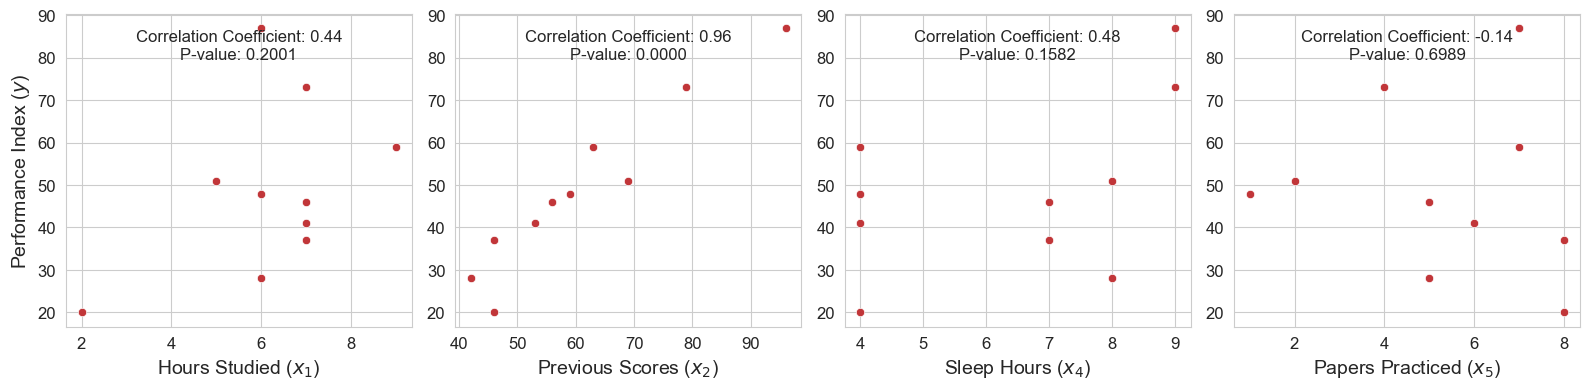

In [71]:
# Relevancy check between independent and dependent variables

# randomly select 10 row entries
random_sample = data.sample(n=10, random_state=42)  # Change random_state if you want different random samples

# Calculate Pearson correlation coefficient and p-value for each scatter plot
correlation_hours_studied, p_value_hours_studied = pearsonr(random_sample['Hours Studied'], random_sample['Performance Index'])
correlation_previous_scores, p_value_previous_scores = pearsonr(random_sample['Previous Scores'], random_sample['Performance Index'])
correlation_sleep_hours, p_value_sleep_hours = pearsonr(random_sample['Sleep Hours'], random_sample['Performance Index'])
correlation_sample_questions, p_value_sample_questions = pearsonr(random_sample['Sample Question Papers Practiced'], random_sample['Performance Index'])

# Create subplots for the scatter plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plot scatter plot for 'Hours Studied' vs 'Performance Index'
sns.scatterplot(data=random_sample, x='Hours Studied', y='Performance Index', ax=axes[0])
axes[0].set_xlabel('Hours Studied ($x_1$)', fontsize = 14)
axes[0].set_ylabel('Performance Index ($y$)', fontsize = 14)
axes[0].tick_params(labelsize=12)
axes[0].text(0.5, 0.95, f"Correlation Coefficient: {correlation_hours_studied:.2f}\nP-value: {p_value_hours_studied:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[0].transAxes)

# Plot scatter plot for 'Previous Scores' vs 'Performance Index'
sns.scatterplot(data=random_sample, x='Previous Scores', y='Performance Index', ax=axes[1])
axes[1].set_xlabel('Previous Scores ($x_2$)', fontsize = 14)
axes[1].set_ylabel('')
axes[1].tick_params(labelsize=12)
axes[1].text(0.5, 0.95, f"Correlation Coefficient: {correlation_previous_scores:.2f}\nP-value: {p_value_previous_scores:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[1].transAxes)


# Plot scatter plot for 'Sleep Hours' vs 'Performance Index'
sns.scatterplot(data=random_sample, x='Sleep Hours', y='Performance Index', ax=axes[2])
axes[2].set_xlabel('Sleep Hours ($x_4$)', fontsize = 14)
axes[2].set_ylabel('')
axes[2].tick_params(labelsize=12)
axes[2].text(0.5, 0.95, f"Correlation Coefficient: {correlation_sleep_hours:.2f}\nP-value: {p_value_sleep_hours:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[2].transAxes)


# Plot scatter plot for 'Sample Question Papers Practiced' vs 'Performance Index'
sns.scatterplot(data=random_sample, x='Sample Question Papers Practiced', y='Performance Index', ax=axes[3])
axes[3].set_xlabel('Papers Practiced ($x_5$)', fontsize = 14)
axes[3].set_ylabel('')
axes[3].tick_params(labelsize=12)
axes[3].text(0.5, 0.95, f"Correlation Coefficient: {correlation_sample_questions:.2f}\nP-value: {p_value_sample_questions:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[3].transAxes)


# Adjust layout parameters to ensure proper label fitting
plt.tight_layout()

# Print Pearson correlation coefficients
print("Pearson Correlation Coefficient for Hours Studied:", correlation_hours_studied)
print("Pearson Correlation Coefficient for Previous Scores:", correlation_previous_scores)
print("Pearson Correlation Coefficient for Sleep Hours:", correlation_sleep_hours)
print("Pearson Correlation Coefficient for Sample Question Papers Practiced:", correlation_sample_questions)

# Save the plot as a PNG file with high resolution
plt.savefig('scatterplot1.png', dpi=300)  # Adjust dpi (dots per inch) for higher resolution if needed

plt.show()

Pearson Correlation Coefficient for Hours Studied: 0.17645069511754477
Pearson Correlation Coefficient for Previous Scores: 0.06210032842435739
Pearson Correlation Coefficient for Sleep Hours: -0.015278704562014495


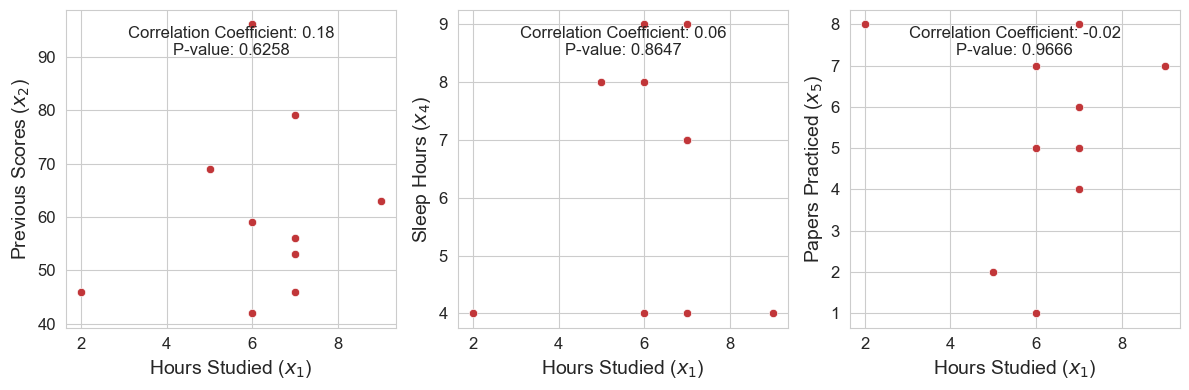

In [72]:
# Multicollinearity check among independent variables

# Calculate Pearson correlation coefficient and p-value for each scatter plot
correlation_hours_studied, p_value_hours_studied = pearsonr(random_sample['Hours Studied'], random_sample['Previous Scores'])
correlation_previous_scores, p_value_previous_scores = pearsonr(random_sample['Hours Studied'], random_sample['Sleep Hours'])
correlation_sleep_hours, p_value_sleep_hours = pearsonr(random_sample['Hours Studied'], random_sample['Sample Question Papers Practiced'])

# Create subplots for the scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot scatter plot for 'Hours Studied' vs 'Previous Scores'
sns.scatterplot(data=random_sample, x='Hours Studied', y='Previous Scores', ax=axes[0])
axes[0].set_xlabel('Hours Studied ($x_1$)', fontsize=14)
axes[0].set_ylabel('Previous Scores ($x_2$)', fontsize=14)
axes[0].tick_params(labelsize=12)
axes[0].text(0.5, 0.95, f"Correlation Coefficient: {correlation_hours_studied:.2f}\nP-value: {p_value_hours_studied:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[0].transAxes)

# Plot scatter plot for 'Hours Studied' vs 'Sleep Hours'
sns.scatterplot(data=random_sample, x='Hours Studied', y='Sleep Hours', ax=axes[1])
axes[1].set_xlabel('Hours Studied ($x_1$)', fontsize=14)
axes[1].set_ylabel('Sleep Hours ($x_4$)', fontsize=14)
axes[1].tick_params(labelsize=12)
axes[1].text(0.5, 0.95, f"Correlation Coefficient: {correlation_previous_scores:.2f}\nP-value: {p_value_previous_scores:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[1].transAxes)

# Plot scatter plot for 'Hours Studied' vs 'Sample Question Papers Practiced'
sns.scatterplot(data=random_sample, x='Hours Studied', y='Sample Question Papers Practiced', ax=axes[2])
axes[2].set_xlabel('Hours Studied ($x_1$)', fontsize=14)
axes[2].set_ylabel('Papers Practiced ($x_5$)', fontsize=14)
axes[2].tick_params(labelsize=12)
axes[2].text(0.5, 0.95, f"Correlation Coefficient: {correlation_sleep_hours:.2f}\nP-value: {p_value_sleep_hours:.4f}", fontsize=12, horizontalalignment='center', verticalalignment='top', transform=axes[2].transAxes)

# Adjust layout parameters to ensure proper label fitting
plt.tight_layout()

# Print Pearson correlation coefficients
print("Pearson Correlation Coefficient for Hours Studied:", correlation_hours_studied)
print("Pearson Correlation Coefficient for Previous Scores:", correlation_previous_scores)
print("Pearson Correlation Coefficient for Sleep Hours:", correlation_sleep_hours)

# Save the plot as a PNG file with high resolution
plt.savefig('scatterplot2.png', dpi=300)  # Adjust dpi (dots per inch) for higher resolution if needed

plt.show()


Pearson Correlation Coefficient for Hours Studied: 0.4997943183494221
Pearson Correlation Coefficient for Previous Scores: -0.15921322607426278
Pearson Correlation Coefficient for Sleep Hours: -0.11063729618111967


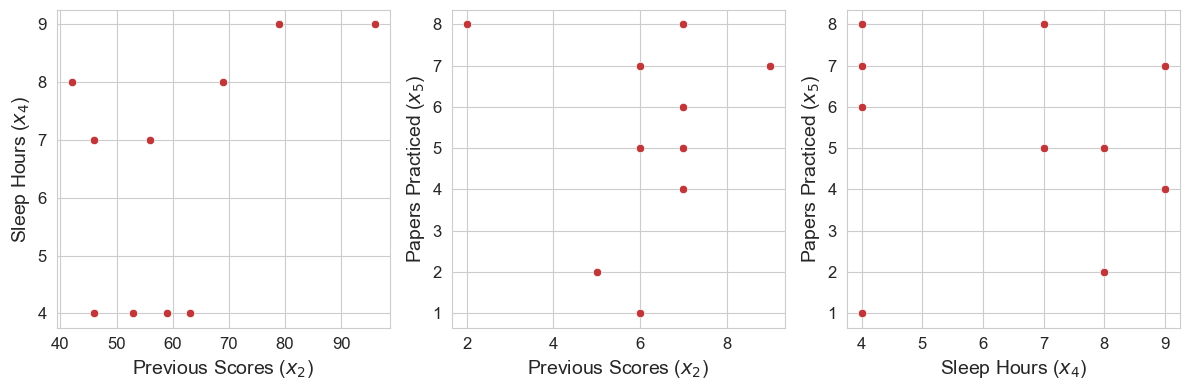

In [74]:
# Multicollinearity check among independent variables

# Calculate Pearson correlation coefficient for each scatter plot
correlation_hours_studied = random_sample['Previous Scores'].corr(random_sample['Sleep Hours'])
correlation_previous_scores = random_sample['Previous Scores'].corr(random_sample['Sample Question Papers Practiced'])
correlation_sleep_hours = random_sample['Sleep Hours'].corr(random_sample['Sample Question Papers Practiced'])

# Create subplots for the scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot scatter plot for 'Previous Scores' vs 'Sleep Hours'
sns.scatterplot(data=random_sample, x='Previous Scores', y='Sleep Hours', ax=axes[0])
axes[0].set_xlabel('Previous Scores ($x_2$)', fontsize = 14)
axes[0].set_ylabel('Sleep Hours ($x_4$)', fontsize = 14)
axes[0].tick_params(labelsize=12)

# Plot scatter plot for 'Previous Scores' vs 'Sample Question Papers Practiced'
sns.scatterplot(data=random_sample, x='Hours Studied', y='Sample Question Papers Practiced', ax=axes[1])
axes[1].set_xlabel('Previous Scores ($x_2$)', fontsize = 14)
axes[1].set_ylabel('Papers Practiced ($x_5$)', fontsize = 14)
axes[1].tick_params(labelsize=12)

# Plot scatter plot for 'Sleep Hours' vs 'Sample Question Papers Practiced'
sns.scatterplot(data=random_sample, x='Sleep Hours', y='Sample Question Papers Practiced', ax=axes[2])
#axes[2].set_title('Sleep Hours vs Performance Index')
axes[2].set_xlabel('Sleep Hours ($x_4$)', fontsize = 14)
axes[2].set_ylabel('Papers Practiced ($x_5$)', fontsize = 14)
axes[2].tick_params(labelsize=12)


# Adjust layout parameters to ensure proper label fitting
plt.tight_layout()

# Print Pearson correlation coefficients
print("Pearson Correlation Coefficient for Hours Studied:", correlation_hours_studied)
print("Pearson Correlation Coefficient for Previous Scores:", correlation_previous_scores)
print("Pearson Correlation Coefficient for Sleep Hours:", correlation_sleep_hours)
#print("Pearson Correlation Coefficient for Sample Question Papers Practiced:", correlation_sample_questions)

# Save the plot as a PNG file with high resolution
plt.savefig('scatterplot3.png', dpi=300)  # Adjust dpi (dots per inch) for higher resolution if needed

plt.show()

In [117]:
# Show the table for the 10 random row entries
data = pd.read_csv(path)
random_sample = data[['Previous Scores', 'Extracurricular Activities', 'Performance Index']].sample(n=10, random_state=42)  # Change random_state if you want different random samples

random_sample

,Previous Scores,Extracurricular Activities,Performance Index
6252,69,No,51
4684,46,No,20
1731,56,Yes,46
4742,42,No,28
4521,53,No,41
6340,63,Yes,59
576,59,Yes,48
5202,96,Yes,87
6363,46,No,37
439,79,Yes,73


In [118]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Extracurricular Activities' column
random_sample['Extracurricular Activities'] = random_sample['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

random_sample

,Previous Scores,Extracurricular Activities,Performance Index
6252,69,0,51
4684,46,0,20
1731,56,1,46
4742,42,0,28
4521,53,0,41
6340,63,1,59
576,59,1,48
5202,96,1,87
6363,46,0,37
439,79,1,73


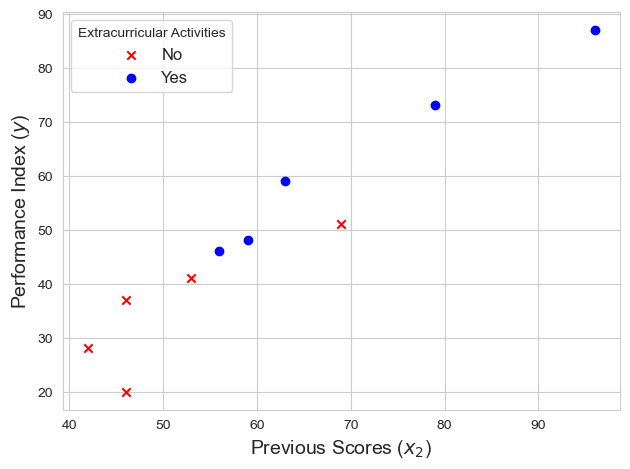

In [119]:
# Separate data based on 'Extracurricular Activities'
no_activities = random_sample[random_sample['Extracurricular Activities'] == 0]
yes_activities = random_sample[random_sample['Extracurricular Activities'] == 1]

# Plot scatter plot for 'Previous Scores' vs 'Performance Index' with blue circles and red crosses as markers based on 'Extracurricular Activities'
plt.scatter(no_activities['Previous Scores'], no_activities['Performance Index'], c='red', marker='x', label='No')
plt.scatter(yes_activities['Previous Scores'], yes_activities['Performance Index'], c='blue', marker='o', label='Yes')

plt.xlabel('Previous Scores ($x_2$)', fontsize=14)
plt.ylabel('Performance Index ($y$)', fontsize=14)
#.title('Previous Scores vs Performance Index with Extracurricular Activities', fontsize=14)
plt.legend(title='Extracurricular Activities', fontsize=12)

# Adjust layout parameters to ensure proper label fitting
plt.tight_layout()

# Save the plot as a PNG file with high resolution
plt.savefig('scatterplot4.png', dpi=300)  # Adjust dpi (dots per inch) for higher resolution if needed


plt.show()


In [120]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [125]:
# Fit the multiple regression model for x2 and x3
y = random_sample['Performance Index']
X2 = random_sample['Previous Scores']
X3 = random_sample['Extracurricular Activities']

model = ols('y ~ X2 + X3', data=random_sample).fit()

# Calculate Total Sum of Squares (SST)
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)

# Calculate Model Sum of Squares (SSM)
y_pred = model.predict()
SSM = np.sum((y_pred - y_mean) ** 2)

# Calculate Residual Sum of Squares (SSE)
SSE = SST - SSM

# Calculate Degrees of Freedom (DF)
n = len(random_sample)
p = len(model.params) - 1  # Number of predictors
DFM = p
DFE = n - p - 1

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate R-square
R_squared = model.rsquared

# Calculate adjusted R-square
adjusted_R_squared = 1 - (1 - R_squared) * ((n - 1) / (n - p - 1))

# Calculate predicted R-square
predicted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

# Print the ANOVA table and calculated metrics
print("ANOVA Table:")
print(anova_table)
print("\nR-squared:", R_squared)
print("Adjusted R-squared:", adjusted_R_squared)
print("Predicted R-squared:", predicted_R_squared)
print("\nTotal Sum of Squares (SST):", SST)
print("Model Sum of Squares (SSM):", SSM)
print("Residual Sum of Squares (SSE):", SSE)
print("Degrees of Freedom (Model):", DFM)
print("Degrees of Freedom (Error):", DFE)

ANOVA Table:
               sum_sq   df          F    PR(>F)
X2        1567.624329  1.0  53.068962  0.000165
X3          97.200131  1.0   3.290527  0.112557
Residual   206.775671  7.0        NaN       NaN

R-squared: 0.9429426956716126
Adjusted R-squared: 0.9266406087206448
Predicted R-squared: 0.9266406087206448

Total Sum of Squares (SST): 3624.0
Model Sum of Squares (SSM): 3417.2243291139225
Residual Sum of Squares (SSE): 206.77567088607748
Degrees of Freedom (Model): 2
Degrees of Freedom (Error): 7


In [127]:
# Fit the multiple regression model for x1, x2, x3 and x4

random_sample1 = data.sample(n=10, random_state=42)  # Change random_state if you want different random samples

# Replace 'Yes' with 1 and 'No' with 0 in the 'Extracurricular Activities' column
random_sample1['Extracurricular Activities'] = random_sample1['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

y = random_sample1['Performance Index']
X1 = random_sample1['Hours Studied']
X2 = random_sample1['Previous Scores']
X3 = random_sample1['Extracurricular Activities']
X4 = random_sample1['Sample Question Papers Practiced']

model = ols('y ~ X1 + X2 + X3 + X4', data=random_sample).fit()

# Calculate Total Sum of Squares (SST)
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)

# Calculate Model Sum of Squares (SSM)
y_pred = model.predict()
SSM = np.sum((y_pred - y_mean) ** 2)

# Calculate Residual Sum of Squares (SSE)
SSE = SST - SSM

# Calculate Degrees of Freedom (DF)
n = len(random_sample)
p = len(model.params) - 1  # Number of predictors
DFM = p
DFE = n - p - 1

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate R-square
R_squared = model.rsquared

# Calculate adjusted R-square
adjusted_R_squared = 1 - (1 - R_squared) * ((n - 1) / (n - p - 1))

# Calculate predicted R-square
predicted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

# Print the ANOVA table and calculated metrics
print("ANOVA Table:")
print(anova_table)
print("\nR-squared:", R_squared)
print("Adjusted R-squared:", adjusted_R_squared)
print("Predicted R-squared:", predicted_R_squared)
print("\nTotal Sum of Squares (SST):", SST)
print("Model Sum of Squares (SSM):", SSM)
print("Residual Sum of Squares (SSE):", SSE)
print("Degrees of Freedom (Model):", DFM)
print("Degrees of Freedom (Error):", DFE)

ANOVA Table:
               sum_sq   df           F    PR(>F)
X1         184.978711  1.0   55.973786  0.000674
X2        1701.333326  1.0  514.816361  0.000003
X3           6.719439  1.0    2.033274  0.213219
X4           0.950380  1.0    0.287581  0.614764
Residual    16.523691  5.0         NaN       NaN

R-squared: 0.9954404825268567
Adjusted R-squared: 0.991792868548342
Predicted R-squared: 0.991792868548342

Total Sum of Squares (SST): 3624.0
Model Sum of Squares (SSM): 3607.4763086773332
Residual Sum of Squares (SSE): 16.523691322666764
Degrees of Freedom (Model): 4
Degrees of Freedom (Error): 5
